# COGS 189: Typing & Attention

## Sources:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.make_interp_spline.html

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os.path import join as pjoin
import scipy
import json

import seaborn as sns
sns.set()
sns.set_context('talk')

## Reading the Saved Dataframes

In [2]:
norm_control = pd.read_csv('dataframes/norm_control.csv')
norm_IV1 = pd.read_csv('dataframes/norm_IV1.csv')
norm_IV2 = pd.read_csv('dataframes/norm_IV2.csv')
norm_IVboth = pd.read_csv('dataframes/norm_IVboth.csv')

norm_IV1_typing = pd.read_csv('dataframes/norm_IV1_typing.csv')
norm_IV2_typing = pd.read_csv('dataframes/norm_IV2_typing.csv')
norm_IVboth_typing = pd.read_csv('dataframes/norm_IVboth_typing.csv')

# Data Analysis

## Bar Plots

### Loudness, Familiarity, Both (IVs) VS. WPM (DV)

In [3]:
avg_normTyping1 = norm_IV1_typing.mean(axis=0)
print(avg_normTyping1)

print(avg_normTyping1['WPM'])
print(avg_normTyping1['accuracy'])

WPM           1.098439
accuracy      1.044638
keystrokes    1.054889
keypos        1.098456
keyneg        0.574468
dtype: float64
1.0984393757503
1.0446383488777558


In [4]:
avg_normTyping2 = norm_IV2_typing.mean(axis=0)
print(avg_normTyping2)

print(avg_normTyping2['WPM'])
print(avg_normTyping2['accuracy'])

WPM           1.137188
accuracy      1.050953
keystrokes    1.069630
keypos        1.132995
keyneg        0.465327
dtype: float64
1.1371882086167802
1.050953163166412


In [5]:
avg_normTyping3 = norm_IVboth_typing.mean(axis=0)
print(avg_normTyping3)

print(avg_normTyping3['WPM'])
print(avg_normTyping3['accuracy'])

WPM           1.172136
accuracy      1.057899
keystrokes    1.119757
keypos        1.169199
keyneg        0.576340
dtype: float64
1.1721355208750166
1.0578990065459133


In [6]:
WPM_df = pd.DataFrame([('norm_IV1_typing', avg_normTyping1['WPM']),
                       ('norm_IV2_typing', avg_normTyping2['WPM']),
                       ('norm_IVboth_typing', avg_normTyping3['WPM'])],
         columns=('Typing', 'WPM'))

WPM_df

,Typing,WPM
0,norm_IV1_typing,1.098439
1,norm_IV2_typing,1.137188
2,norm_IVboth_typing,1.172136


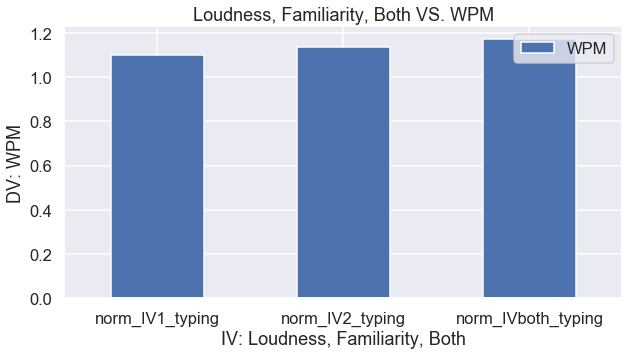

In [7]:
WPM_df.plot.bar(x='Typing', y='WPM', rot=0, 
                figsize=(10,5), 
                title='Loudness, Familiarity, Both VS. WPM', 
                xlabel="IV: Loudness, Familiarity, Both",
                ylabel="DV: WPM")


### Loudness, Familiarity, Both (IVs) VS. Accuracy (DV)

In [8]:
accuracy_df = pd.DataFrame([('norm_IV1_typing', avg_normTyping1['accuracy']),
                       ('norm_IV2_typing', avg_normTyping2['accuracy']),
                       ('norm_IVboth_typing', avg_normTyping3['accuracy'])],
         columns=('Typing', 'Accuracy'))

accuracy_df

,Typing,Accuracy
0,norm_IV1_typing,1.044638
1,norm_IV2_typing,1.050953
2,norm_IVboth_typing,1.057899


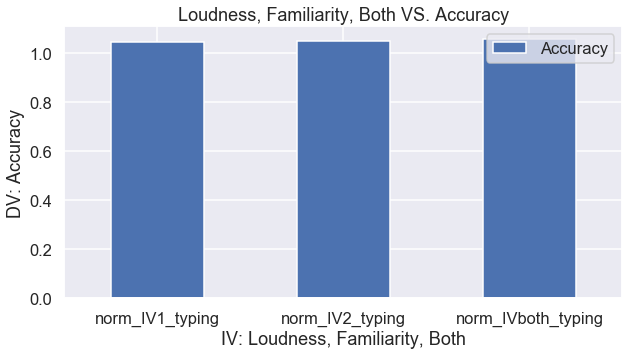

In [9]:
accuracy_df.plot.bar(x='Typing', y='Accuracy', rot=0, 
                figsize=(10,5), 
                title='Loudness, Familiarity, Both VS. Accuracy', 
                xlabel="IV: Loudness, Familiarity, Both",
                ylabel="DV: Accuracy")

### Loudness, Familiarity, Both (IVs) VS. Attention (DV)

In [10]:
#Need help with the attention data since there are so many rows!!!!

## Line Plot: Chart of Attention vs. Time

In [11]:
arr_index = []
for i in range(30824):
    arr_index.append(float(i)/513.7)

In [12]:
attention_vs_time_0 = pd.DataFrame()
attention_vs_time_0['Control'] = norm_control['0']
attention_vs_time_0['IV1'] = norm_IV1['0']
attention_vs_time_0['IV2'] = norm_IV2['0']
attention_vs_time_0['IV_Both'] = norm_IVboth['0']

attention_vs_time_1 = pd.DataFrame()
attention_vs_time_1['Control'] = norm_control['1']
attention_vs_time_1['IV1'] = norm_IV1['1']
attention_vs_time_1['IV2'] = norm_IV2['1']
attention_vs_time_1['IV_Both'] = norm_IVboth['1']

attention_vs_time_2 = pd.DataFrame()
attention_vs_time_2['Control'] = norm_control['2']
attention_vs_time_2['IV1'] = norm_IV1['2']
attention_vs_time_2['IV2'] = norm_IV2['2']
attention_vs_time_2['IV_Both'] = norm_IVboth['2']

In [13]:
attention_vs_time_0 = attention_vs_time_0.set_index([pd.Index(arr_index)])
attention_vs_time_1 = attention_vs_time_1.set_index([pd.Index(arr_index)])
attention_vs_time_2 = attention_vs_time_2.set_index([pd.Index(arr_index)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1222760d0>,
      dtype=object)

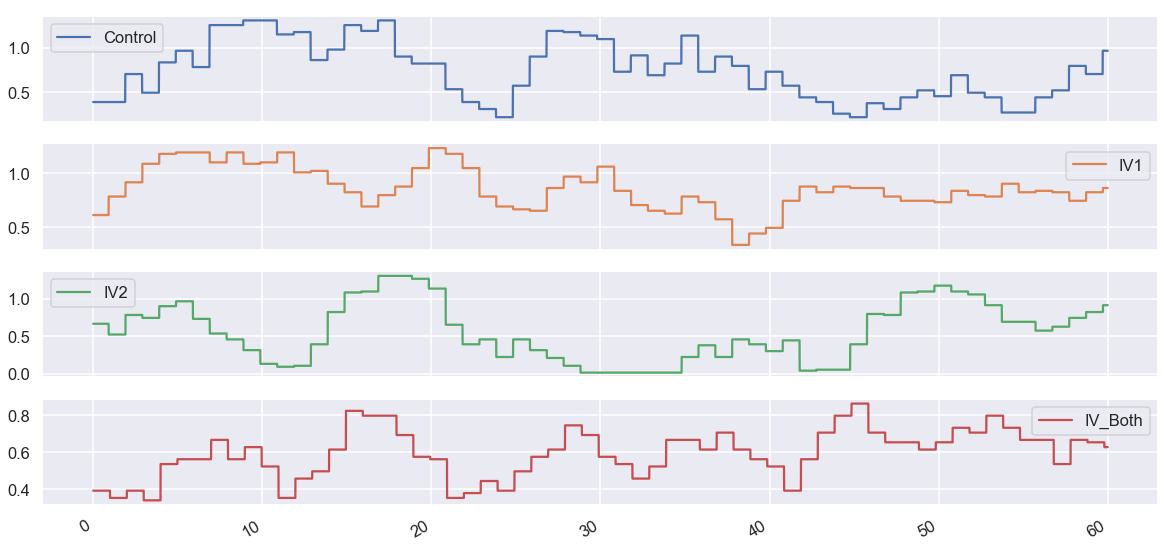

In [14]:
attention_vs_time_0.plot.line(figsize=(20,10), subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122568580>,
      dtype=object)

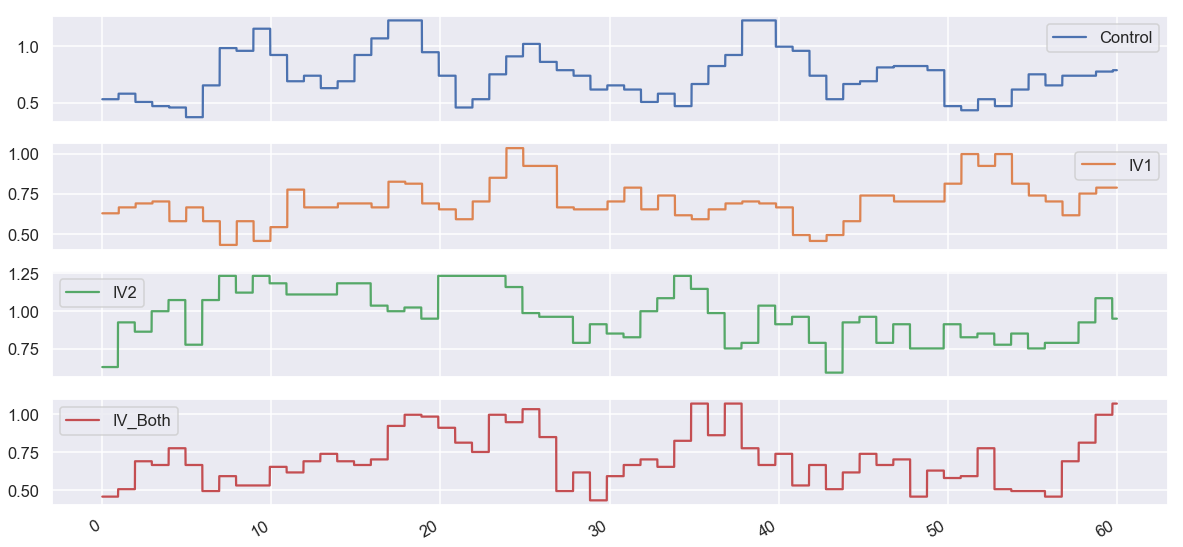

In [15]:
attention_vs_time_1.plot.line(figsize=(20,10), subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1227df220>,
      dtype=object)

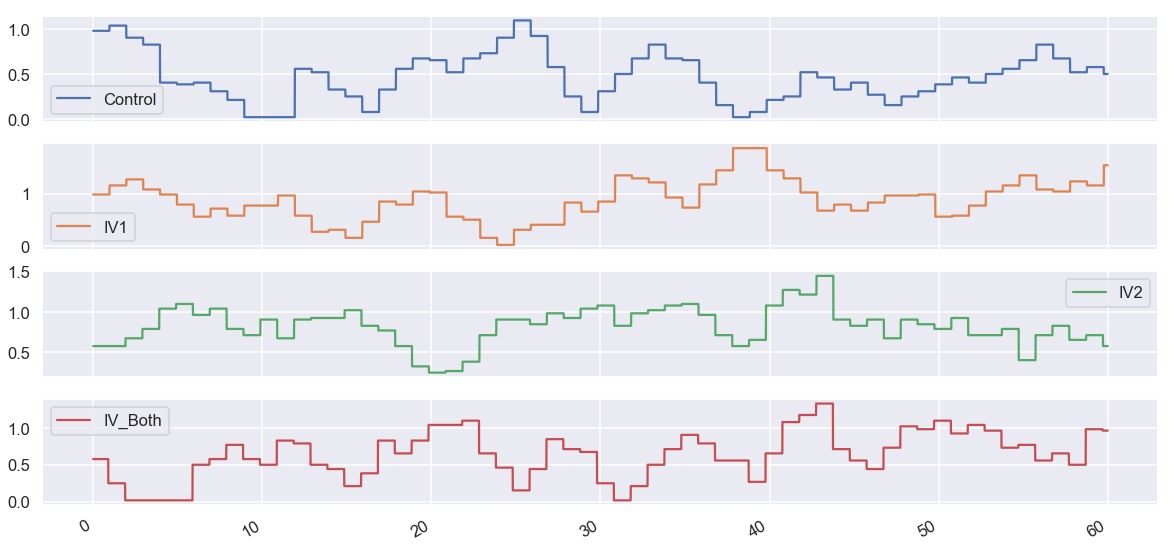

In [16]:
attention_vs_time_2.plot.line(figsize=(20,10), subplots = True)

In [17]:
# Take average of attention over all 3 participants and then compare the 4 plots

In [22]:
attention_vs_time_mean = pd.DataFrame()
attention_vs_time_mean['Control'] = (attention_vs_time_0['Control'] + attention_vs_time_1['Control'] + attention_vs_time_2['Control']) / 3
attention_vs_time_mean['IV1'] = (attention_vs_time_0['IV1'] + attention_vs_time_1['IV1'] + attention_vs_time_2['IV1']) / 3
attention_vs_time_mean['IV2'] = (attention_vs_time_0['IV2'] + attention_vs_time_1['IV2'] + attention_vs_time_2['IV2']) / 3
attention_vs_time_mean['IV_Both'] = (attention_vs_time_0['IV_Both'] + attention_vs_time_1['IV_Both'] + attention_vs_time_2['IV_Both']) / 3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x126847af0>,
      dtype=object)

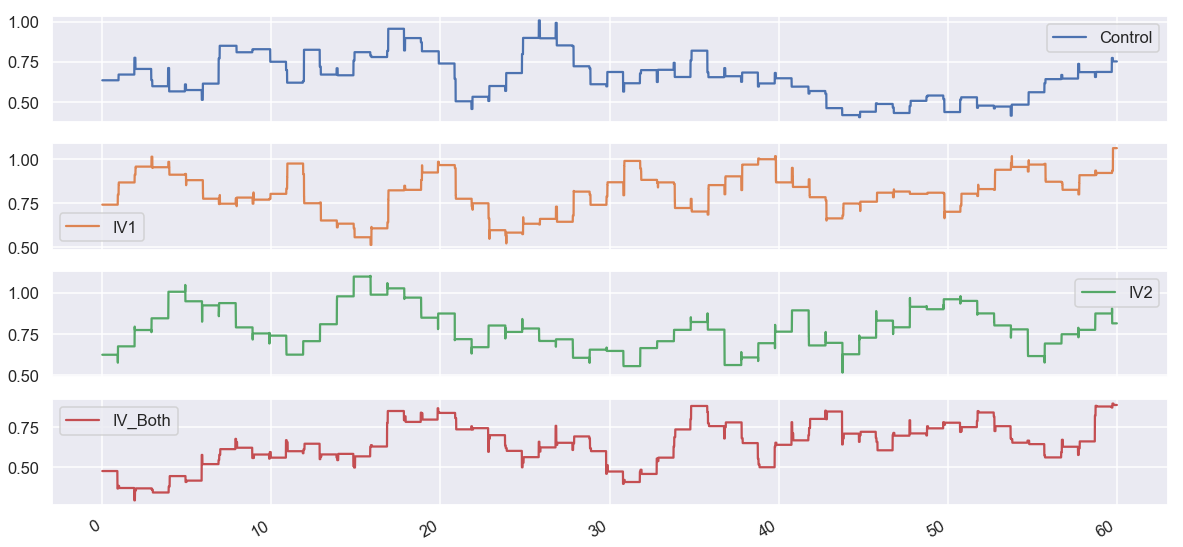

In [117]:
attention_vs_time_mean.plot.line(figsize=(20,10), subplots = True)

## Hypothesis Testing

In [124]:
attention_vs_time_mean.mean()

Control    0.653430
IV1        0.809750
IV2        0.784373
IV_Both    0.643723
dtype: float64

In [126]:
attention_vs_time_mean.std()

Control    0.132801
IV1        0.114496
IV2        0.124571
IV_Both    0.133193
dtype: float64

We can observe that the mean of IV1 and IV2 are more than 2 stds away from the mean of Control, thereby, p-value < 0.05